In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 8})
plt.rc('grid', linestyle="--", color='black', alpha=0.2)

def dataload(filename):
    data = np.genfromtxt(filename, delimiter="\t")
    x = data[:,0]
    y = data[:,1]
    return x, y

def plotter(x, y, xlims, ylims, title, x_coeff = 6, y_coeff = 4.5, dpi = 100):
    fig, ax = plt.subplots(dpi=dpi)

    N = len(xlims)
    subs = []
    for i in range(N):
        sub = inset_axes(ax, width=2, height=0.9, bbox_to_anchor=[x_coeff*dpi, dpi*(y_coeff - 1.10*(i))])
        mark_inset(ax, sub, loc1=4, loc2=3, ec="r", alpha = 0.3, zorder = -1)
        sub.plot(x, y, lw=0.5, c='black')
        sub.set_ylim(0, ylims[i])
        sub.set_xlim(xlims[i][0], xlims[i][1])
        sub.invert_xaxis()
        subs.append(sub)

    ax.plot(x, y, lw=0.5, c="black")
    ax.set_xlim(-1, 10.5)
    ax.invert_xaxis()
    ax.set_ylabel("Intensidad (u.a)")
    ax.set_xlabel("$\delta$ (ppm)")
    plt.suptitle(title, fontsize=12)
    
    return fig, ax, subs

def plot_text(axes, xcoor, ycoor, index):
    axes.text(xcoor, ycoor, chr(ord('A') + index), color="blue", fontsize=10)

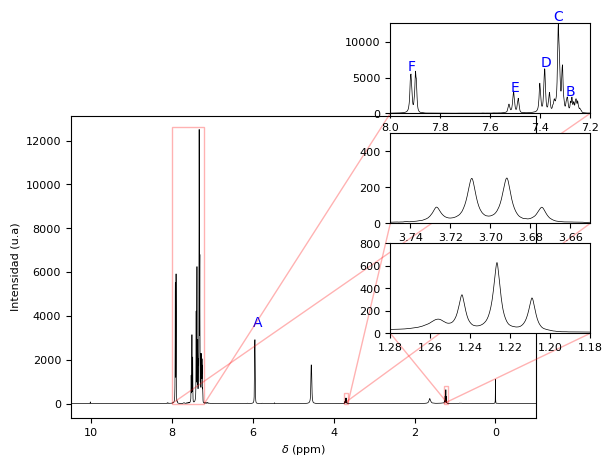

In [4]:
x, y = dataload("benzoina.txt")
xlims = [(7.2, 8.0), (3.65, 3.75), (1.18, 1.28)]
ylims = [max(y)*1.01, 500, 800]

fig, ax, subs = plotter(x, y, xlims, ylims, "")
xnames = [6.0, 7.3, 7.35, 7.4, 7.52, 7.93]
ynames = [3.5e3, 2.5e3, 13e3, 6.5e3, 3e3, 6e3]
where = [ax]
where += [subs[0] for i in range(len(xnames) - 1)]
[plot_text(where[i], xnames[i], ynames[i], i) for i in range(len(xnames))]

plt.show()
fig.savefig("H-Benzoina-T.png", transparent = True, bbox_inches='tight')

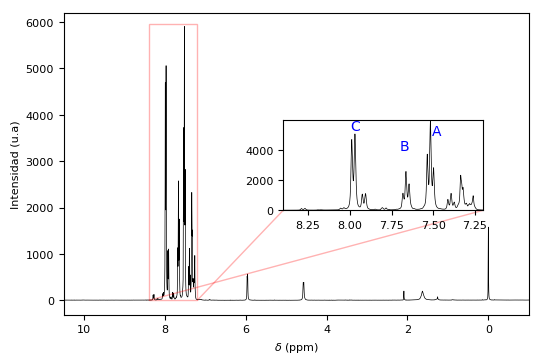

In [10]:
x, y = dataload("benzil_cu.txt")
xlims = [(7.2, 8.4)]
ylims = [max(y)*1.01]

fig, ax, subs = plotter(x, y, xlims, ylims, "", x_coeff=5, y_coeff=2.5)
xnames = [7.51, 7.7, 8.0]
ynames = [5e3, 4e3, 5.3e3]
where = [subs[0] for i in range(len(xnames))]
[plot_text(where[i], xnames[i], ynames[i], i) for i in range(len(xnames))]
plt.show()
fig.savefig("H-BenzilCu-T.png", transparent = True, bbox_inches='tight')

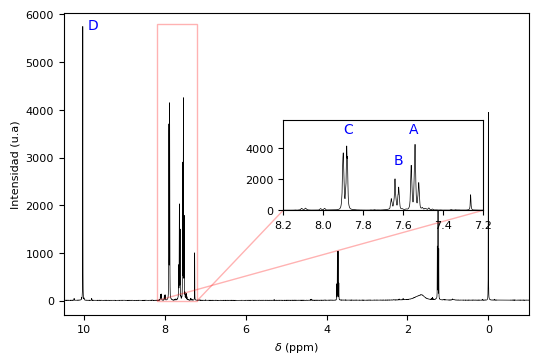

In [5]:
x, y = dataload("benzaldehido.txt")
xlims = [(7.2, 8.2)]
ylims = [max(y)*1.01]

fig, ax, subs = plotter(x, y, xlims, ylims, "", x_coeff=5, y_coeff=2.5)
xnames = [7.57, 7.65, 7.9, 9.9]
ynames = [5e3, 3e3, 5e3, 5700]
where = [subs[0] for i in range(len(xnames)-1)] + [ax]
[plot_text(where[i], xnames[i], ynames[i], i) for i in range(len(xnames))]
plt.show()
fig.savefig("H-Benzaldehido-T.png", transparent = True, bbox_inches='tight')